## Análisis GRBs

El set de simulaciones esta compuesto por 10000 lluvias verticales de Gamma con energías entre 100 GeV y 1 TeV. Simuladas con una distribución espectral con $\gamma = $-2.2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pylab
import random

import os

In [2]:
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [3]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/csarmiento/Documentos/rpc_work/")
os.getcwd()

'/home/csarmiento/Documentos/rpc_work'

In [4]:
# 100 MeV
# 
df= pd.read_csv(r"100_1000GeV_GRB/100000.pri.bz2", compression='bz2', delimiter=" ")
df.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,181.571,-18.5877,0.0,0.0,909.0,114.0,0.0,0.0,1023.0
1,1,217.760,-23.3191,0.0,0.0,459.0,38.0,1.0,0.0,498.0
2,1,191.758,-33.9077,0.0,0.0,178.0,13.0,0.0,0.0,191.0
3,1,180.774,-31.8927,0.0,0.0,284.0,29.0,0.0,0.0,313.0
4,1,139.967,-24.0383,0.0,0.0,501.0,43.0,0.0,0.0,544.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prm_Crk_id   10000 non-null  int64  
 1   prm_energy   10000 non-null  float64
 2   prm_x0       10000 non-null  float64
 3   prm_theta    10000 non-null  float64
 4   prm_phi      10000 non-null  float64
 5   ph_obs_lev   10000 non-null  float64
 6   el_obs_lev   10000 non-null  float64
 7   hd_obs_lev   10000 non-null  float64
 8   mu_obs_lev   10000 non-null  float64
 9   tot_obs_lev  10000 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


In [6]:
ds = pd.read_csv(r"100_1000GeV_GRB/100000.sec.bz2", compression='bz2', delimiter=" ")

/home/csarmiento/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,3,4,5,7,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#Conversión de string a float de algunas variables
#
ds['CorsikaId'] = pd.to_numeric(ds['CorsikaId'],errors='coerce')
ds['shower_id'] = pd.to_numeric(ds['shower_id'],errors='coerce')
ds['x'] = pd.to_numeric(ds['x'],errors='coerce')
ds['y'] = pd.to_numeric(ds['y'],errors='coerce')

ds['px'] = pd.to_numeric(ds['px'],errors='coerce')
ds['py'] = pd.to_numeric(ds['py'],errors='coerce')
ds['pz'] = pd.to_numeric(ds['pz'],errors='coerce')

ds['x'] = ds['x']/100
ds['y'] = ds['y']/100

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595960 entries, 0 to 7595959
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CorsikaId   float64
 1   px          float64
 2   py          float64
 3   pz          float64
 4   x           float64
 5   y           float64
 6   t           float64
 7   shower_id   float64
 8   prm_id      object 
 9   prm_energy  float64
 10  prm_theta   object 
 11  prm_phi     float64
dtypes: float64(10), object(2)
memory usage: 695.4+ MB


In [9]:
g1=np.linspace(0, 10, 11)
dss=pd.DataFrame()
for i in np.arange(0,10):
    aux = ds[ds["shower_id"]==g1[i]]
    dss=dss.append(aux)

In [25]:
def grb_rdn(dfr, k):
    dfr=pd.DataFrame()
    r=np.linspace(0,9999,10000).tolist()
    g=random.sample(r, k)
    print(g)
    for i in np.arange(0,10):
        aux_[i] = ds[ds["shower_id"]==g[i]]
        print()
        return(dfr)

In [26]:
def grb_rdn(dfr, k):
    dfr=pd.DataFrame()
    r=np.linspace(0,9999,10000).tolist()
    g=random.sample(r, k)
    aux1 = ds[ds["shower_id"]==g[1]]
    aux2 = ds[ds["shower_id"]==g[2]]
    aux3 = ds[ds["shower_id"]==g[3]]
    aux4 = ds[ds["shower_id"]==g[4]]
    aux5 = ds[ds["shower_id"]==g[5]]
    aux6 = ds[ds["shower_id"]==g[6]]
    aux7 = ds[ds["shower_id"]==g[7]]
    aux8 = ds[ds["shower_id"]==g[8]]
    aux9 = ds[ds["shower_id"]==g[9]]
    aux10 = ds[ds["shower_id"]==g[0]]
    dfr=dfr.append([aux1, aux2, aux3, aux4, aux5, aux6, aux9, aux8, aux9, aux10])
    return(dfr)

In [27]:
grb_rdn(df, 10)

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
1927544,1.0,0.000287,-0.000323,0.000287,-641.277000,-379.5490,371448.0,2485.0,1,116.818,0,0.0
1927545,1.0,-0.000016,-0.000077,0.000700,-161.073000,-131.7090,370601.0,2485.0,1,116.818,0,0.0
1927546,1.0,0.000002,0.001777,0.011744,-24.141800,680.7290,370752.0,2485.0,1,116.818,0,0.0
1927547,1.0,-0.001070,-0.002292,0.010247,134.300000,1390.2900,371028.0,2485.0,1,116.818,0,0.0
1927548,1.0,0.000163,0.000312,0.000849,381.535000,1930.4300,371133.0,2485.0,1,116.818,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7594906,1.0,-0.000108,0.000042,0.000124,185.394000,435.8460,370655.0,9999.0,0001,107.191,+00.000,0.0
7594907,1.0,0.000666,-0.000113,0.000184,211.877000,437.5620,370689.0,9999.0,0001,107.191,+00.000,0.0
7594908,1.0,0.000386,0.001385,0.033006,54.945300,235.0170,370595.0,9999.0,0001,107.191,+00.000,0.0
7594909,1.0,-0.001343,-0.000638,0.011190,-0.539383,11.0612,370604.0,9999.0,0001,107.191,+00.000,0.0


In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
dx_1=pd.DataFrame()
dx_1=grb_rdn(dx_1, 10)
dx_1.to_csv('grb_1.txt', sep='\t')

dx_2=pd.DataFrame()
dx_2=grb_rdn(dx_2, 10)
dx_2.to_csv('grb_2.txt', sep='\t')

dx_3=pd.DataFrame()
dx_3=grb_rdn(dx_3, 10)
dx_3.to_csv('grb_3.txt', sep='\t')

dx_4=pd.DataFrame()
dx_4=grb_rdn(dx_4, 10)
dx_4.to_csv('grb_4.txt', sep='\t')

dx_5=pd.DataFrame()
dx_5=grb_rdn(dx_5, 10)
dx_5.to_csv('grb_5.txt', sep='\t')

dx_6=pd.DataFrame()
dx_6=grb_rdn(dx_6, 10)
dx_6.to_csv('grb_6.txt', sep='\t')

dx_7=pd.DataFrame()
dx_7=grb_rdn(dx_7, 10)
dx_7.to_csv('grb_7.txt', sep='\t')

dx_8=pd.DataFrame()
dx_8=grb_rdn(dx_8, 10)
dx_8.to_csv('grb_8.txt', sep='\t')

dx_9=pd.DataFrame()
dx_9=grb_rdn(dx_9, 10)
dx_9.to_csv('grb_9.txt', sep='\t')

dx_10=pd.DataFrame()
dx_10=grb_rdn(dx_10, 10)
dx_10.to_csv('grb_10.txt', sep='\t')

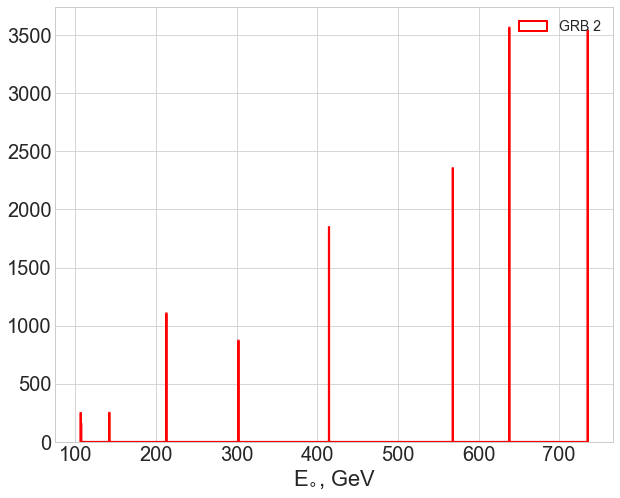

In [48]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
#plt.hist(dx_1["prm_energy"], bins=1000, histtype='step', color="b", linewidth=2, fill=False, label="GRB 1");
plt.hist(dx_2["prm_energy"], bins=1000, histtype='step', color="r", linewidth=2, fill=False, label="GRB 2");
#plt.hist(dx_3["prm_energy"], bins=1000, histtype='step', color="g", linewidth=2, fill=False, label="GRB 3");
plt.xlabel(r"E$_{\circ}$, GeV")
plt.legend()


In [31]:
dx_1.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
4424720,1.0,-0.000442,-0.000786,0.001134,-468.1720,6.70305,370995.0,5758.0,1,156.963,0,0.0
4424721,1.0,0.000169,-0.000002,0.022277,42.2017,20.45690,370578.0,5758.0,1,156.963,0,0.0
4424722,1.0,0.001910,0.002253,0.044930,90.8444,71.70550,370588.0,5758.0,1,156.963,0,0.0
4424723,1.0,0.000516,-0.001140,0.003066,135.5090,296.84300,370692.0,5758.0,1,156.963,0,0.0
4424724,3.0,-0.000460,0.000721,0.000453,137.2540,310.66100,370727.0,5758.0,1,156.963,0,0.0


(0.0, 5.0)

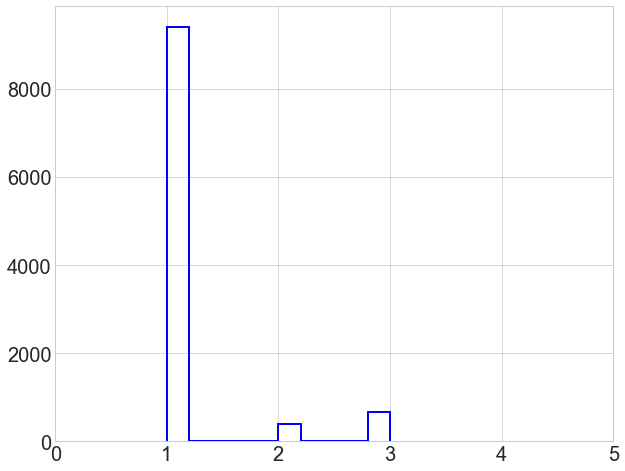

In [32]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(dx_1["CorsikaId"], bins=10, histtype='step', color="b", linewidth=2, fill=False);
plt.xlim(0,5)


In [33]:
E10 = np.sqrt(dx_1["px"]**2 + dx_1["py"]**2 + dx_1["pz"]**2)

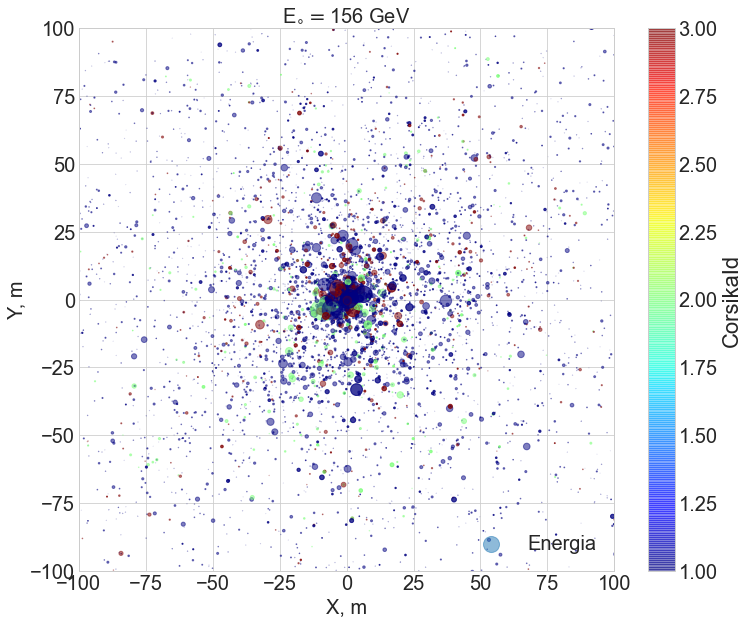

In [43]:
dx_1.plot(kind="scatter", x="x", y="y", alpha=0.5,
    s=E10*100, label="Energia", figsize=(12,10),
    c="CorsikaId", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

#plt.plot(ds_["x"], ds_["y"], '.')
plt.xlabel("X, m", fontsize=20)
plt.ylabel("Y, m", fontsize=20)
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.title(r"E$_{\circ}=$156 GeV", fontsize=20)
plt.legend(fontsize=20)
plt.show()

#### Distribución de energía de los secundarios

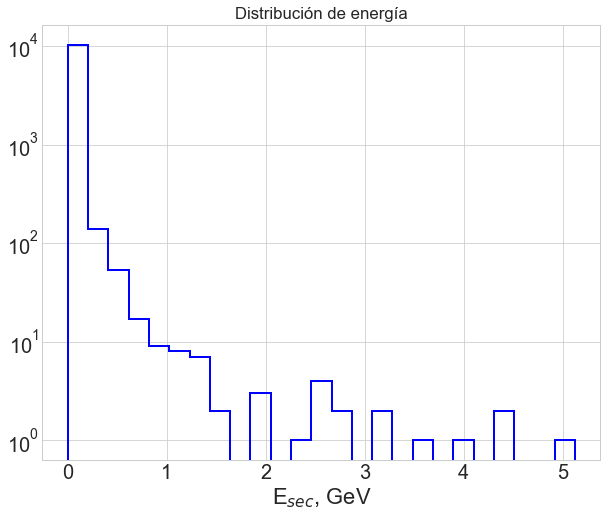

In [35]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(E10, bins=25, histtype='step', color="b", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
plt.title("Distribución de energía")
plt.xlabel(r"E$_{sec}$, GeV")
#plt.legend()
plt.show()

In [36]:
r=np.sqrt(dx_1["x"]**2 + dx_1["y"]**2)

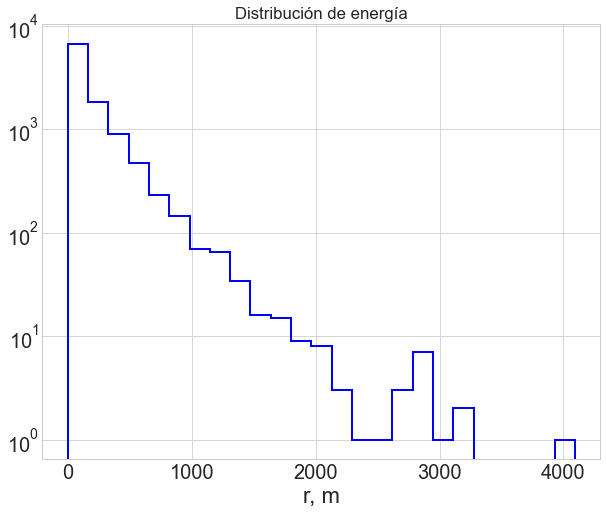

In [37]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(r, bins=25, histtype='step', color="b", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
plt.title("Distribución de energía")
plt.xlabel(r"r, m")
#plt.legend()
plt.show()

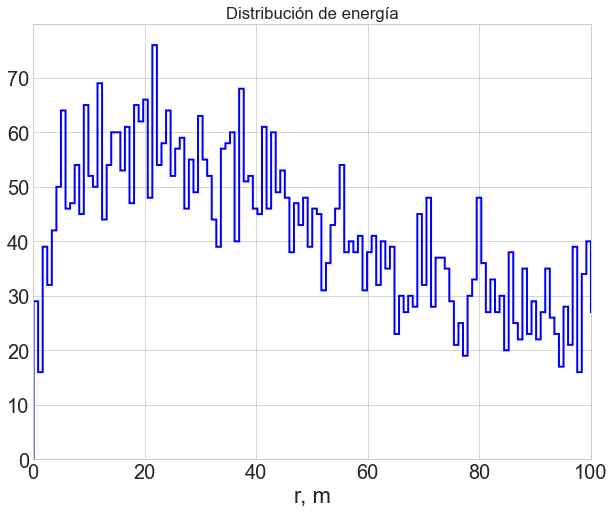

In [49]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(r, bins=5000, histtype='step', color="b", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
#pyplot.yscale('log')
plt.title("Distribución de energía")
plt.xlabel(r"r, m")
plt.xlim(0,100)
plt.show()

In [39]:
dx_1["r"]=np.sqrt(dx_1["x"]**2 + dx_1["y"]**2)
dx_1["Es"] = np.sqrt(dx_1["px"]**2 + dx_1["py"]**2 + dx_1["pz"]**2)

In [40]:
dx_1.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi,r,Es
4424720,1.0,-0.000442,-0.000786,0.001134,-468.1720,6.70305,370995.0,5758.0,1,156.963,0,0.0,468.219983,0.001448
4424721,1.0,0.000169,-0.000002,0.022277,42.2017,20.45690,370578.0,5758.0,1,156.963,0,0.0,46.898489,0.022277
4424722,1.0,0.001910,0.002253,0.044930,90.8444,71.70550,370588.0,5758.0,1,156.963,0,0.0,115.734108,0.045027
4424723,1.0,0.000516,-0.001140,0.003066,135.5090,296.84300,370692.0,5758.0,1,156.963,0,0.0,326.310367,0.003312
4424724,3.0,-0.000460,0.000721,0.000453,137.2540,310.66100,370727.0,5758.0,1,156.963,0,0.0,339.630560,0.000968


In [41]:
dx_1f = dx_1[dx_1["r"]<=10]

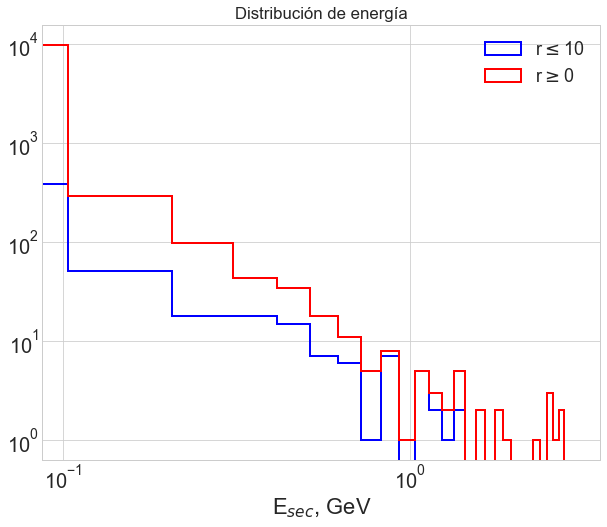

In [54]:
plt.figure(figsize=(10,8))
bins = np.linspace(0, 3, 30)
plt.hist(dx_1f["Es"], bins, histtype='step', color="b", linewidth=2, fill=False, label=r"r$\leq$10");
plt.hist(dx_1["Es"], bins, histtype='step', color="r", linewidth=2, fill=False, label=r"r$\geq$0");
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
pyplot.xscale('log')

plt.title("Distribución de energía")
plt.xlabel(r"E$_{sec}$, GeV")
plt.legend(fontsize=18)
plt.show()

In [55]:
sum(dx_1f["Es"])

111.6667732765761

In [56]:
dx_1f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 4425046 to 2617967
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CorsikaId   535 non-null    float64
 1   px          535 non-null    float64
 2   py          535 non-null    float64
 3   pz          535 non-null    float64
 4   x           535 non-null    float64
 5   y           535 non-null    float64
 6   t           535 non-null    float64
 7   shower_id   535 non-null    float64
 8   prm_id      535 non-null    object 
 9   prm_energy  535 non-null    float64
 10  prm_theta   535 non-null    object 
 11  prm_phi     535 non-null    float64
 12  r           535 non-null    float64
 13  Es          535 non-null    float64
dtypes: float64(12), object(2)
memory usage: 62.7+ KB


In [57]:
dx_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10472 entries, 4424720 to 2618037
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CorsikaId   10472 non-null  float64
 1   px          10472 non-null  float64
 2   py          10472 non-null  float64
 3   pz          10472 non-null  float64
 4   x           10472 non-null  float64
 5   y           10472 non-null  float64
 6   t           10472 non-null  float64
 7   shower_id   10472 non-null  float64
 8   prm_id      10472 non-null  object 
 9   prm_energy  10472 non-null  float64
 10  prm_theta   10472 non-null  object 
 11  prm_phi     10472 non-null  float64
 12  r           10472 non-null  float64
 13  Es          10472 non-null  float64
dtypes: float64(12), object(2)
memory usage: 1.2+ MB
